<a href="https://colab.research.google.com/github/2jeonghoon/LinearAlgebra/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


224
225


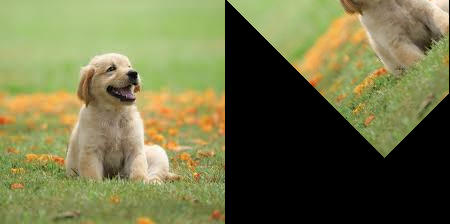

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/dog1.jpeg', cv2.IMREAD_COLOR)
height, width = img.shape[:2]

print(height)
print(width)

angle = 45
radian=angle*np.pi/180
c=np.cos(radian)
s=np.sin(radian)

rotation_matrix=np.array([[c,s,0],[-s,c,0],[0,0,1]], dtype=float)
dst = np.zeros(img.shape, dtype=np.uint8)

for y in range(height-1):
  for x in range(width-1):
    new_p = np.array([x,y,1])
    inv_rotation_matrix=np.linalg.inv(rotation_matrix)
    old_p = np.dot(inv_rotation_matrix, new_p)

    x_,y_ = old_p[:2]
    x_ = int(x_)
    y_ = int(y_)

    if x_>0 and x_<width and y_>0 and y_<height :
      dst[y, x] = img[y_,x_]

result = cv2.hconcat([img,dst])
cv2_imshow(result)


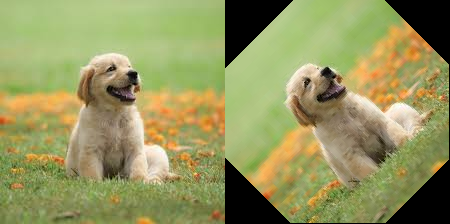

-1

In [7]:
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/dog1.jpeg', cv2.IMREAD_COLOR)
height, width = img.shape[:2]
angle = 45
radian = angle*np.pi/180

c = np.cos(radian)
s = np.sin(radian)

center_x = width/2
center_y = height/2

rotation_matrix = np.array([[c,s,(1-c)*center_x-s*center_y],[-s,c,s*center_x+(1-c)*center_y],[0,0,1]])

dst = np.zeros(img.shape, dtype=np.uint8)

for y in range(height-1):
  for x in range(width-1):
    new_p = np.array([x,y,1])
    inv_rotation_matrix=np.linalg.inv(rotation_matrix)
    old_p = np.dot(inv_rotation_matrix, new_p)
    x_, y_ = old_p[:2]
    x_ = int(x_)
    y_ = int(y_)

    if x_>0 and x_<width and y_>0 and y_<height:
      dst[y,x]=img[y_,x_]

result = cv2.hconcat([img,dst])
cv2_imshow(result)
cv2.waitKey(0)

In [8]:
import numpy as np

A = np.array([10])
B = np.array([[1,2],[3,4]])
C = np.array([[1,2,3],[4,5,6],[7,8,9]])

#print(np.linalg.det(A))
print(np.linalg.det(B))
print(np.linalg.det(C))

-2.0000000000000004
0.0


4.0


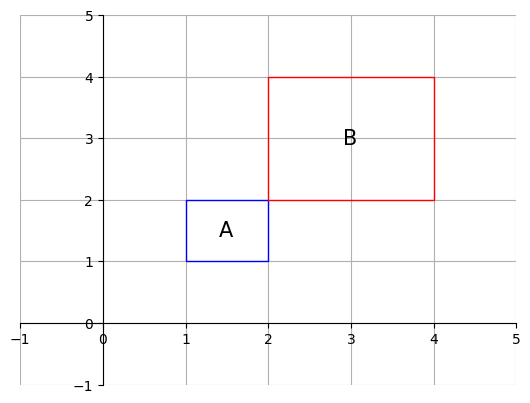

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

points = np.array([[1,1],[1,2],[2,2],[2,1]])
A = np.array([[2,0],[0,2]])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

print(np.linalg.det(A))

ax.add_patch(patches.Polygon(points, fill=False, color='blue', zorder=1))
ax.add_patch(patches.Polygon(np.dot(points,A),fill=False, color='red',zorder=2))
ax.text(1.4,1.4,'A',size=15)
ax.text(2.9,2.9,'B',size=15)
ax.set_xticks(range(-1,6))
ax.set_yticks(range(-1,6))
ax.grid()
ax.set_axisbelow(True)
ax.set_aspect('auto', adjustable='box')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

In [10]:
import numpy as np

#A = np.array([[3,2],[4,1]])

A = np.array([[5,2],[3,1]])
print("A")
print(A)
print()

eigenvalue,eigenvector=np.linalg.eig(A)
print("Eigen-Value")
print(eigenvalue)
print("Eigen-Vector")
print(eigenvector)
print()

eigenvector1=eigenvector[:,0]
eigenvector2=eigenvector[:,1]
eigenvalue1=eigenvalue[0]
eigenvalue2=eigenvalue[1]

print("lambda*eigenvector==A*eigenvector")
print(eigenvalue1*eigenvector1,np.dot(A, eigenvector1))
print(eigenvalue2*eigenvector2,np.dot(A, eigenvector2))

A
[[5 2]
 [3 1]]

Eigen-Value
[ 6.16227766 -0.16227766]
Eigen-Vector
[[ 0.86460354 -0.36126098]
 [ 0.50245469  0.93246475]]

lambda*eigenvector==A*eigenvector
[5.32792709 3.09626531] [5.32792709 3.09626531]
[ 0.05862459 -0.1513182 ] [ 0.05862459 -0.1513182 ]


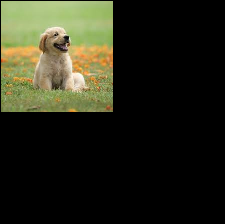

-1

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/dog1.jpeg', cv2.IMREAD_COLOR)
height, width = img.shape[:2]
scale_factor = 0.5
scaling_matrix = np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
dst = np.zeros((height, width, img.shape[2]), dtype=np.uint8)

for y in range(height):
  for x in range(width):
    new_p = np.array([x,y,1])
    inv_scaling_matrix=np.linalg.inv(scaling_matrix)
    old_p = np.dot(inv_scaling_matrix, new_p)
    x_, y_ = old_p[:2]
    x_ = int(x_)
    y_ = int(y_)
    if x_>0 and x_<width and y_>0 and y_<height:
      dst.itemset((y,x,0), img.item(y_,x_,0))
      dst.itemset((y,x,1), img.item(y_,x_,1))
      dst.itemset((y,x,2), img.item(y_,x_,2))

result = cv2.hconcat([img,dst])
cv2_imshow(dst)
cv2.waitKey(0)

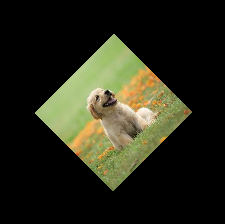

-1

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/dog1.jpeg', cv2.IMREAD_COLOR)

height, width = img.shape[:2]
scale_factor = 0.5
scaling_matrix = np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
translation_matrix=np.array([[1,0,width/4],[0,1,height/4],[0,0,1]])

angle = 45
radian = angle*np.pi/180

c = np.cos(radian)
s = np.sin(radian)

center_x = width/2
center_y = height/2

rotation_matrix = np.array([[c,s,(1-c)*center_x-s*center_y], [-s,c,s*center_x+(1-c)*center_y],[0,0,1]])

T = np.eye(3)
T = np.dot(scaling_matrix, T)
T = np.dot(translation_matrix, T)
T = np.dot(rotation_matrix, T)

dst = np.zeros((height, width, img.shape[2]), dtype=np.uint8)

for y in range(height):
  for x in range(width):
    new_p = np.array([x,y,1])
    inv_scaling_matrix = np.linalg.inv(T)
    old_p = np.dot(inv_scaling_matrix, new_p)
    x_, y_ = old_p[:2]
    x_ = int(x_)
    y_ = int(y_)

    if x_>0 and x_<width and y_>0 and y_<height:
      dst.itemset((y,x,0), img.item(y_,x_,0))
      dst.itemset((y,x,1), img.item(y_,x_,1))
      dst.itemset((y,x,2), img.item(y_,x_,2))

cv2_imshow(dst)
cv2.waitKey(0)

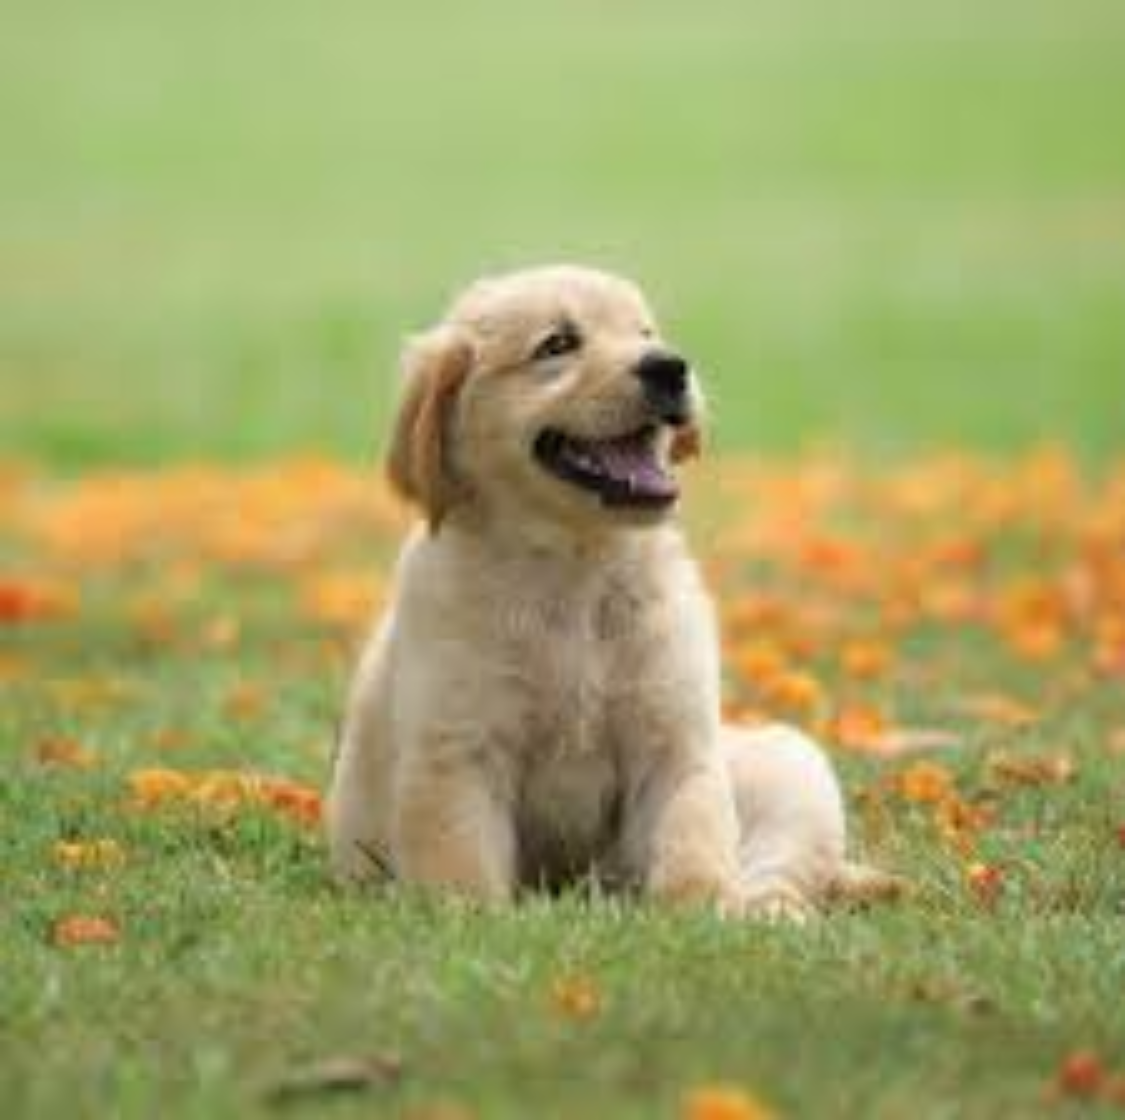

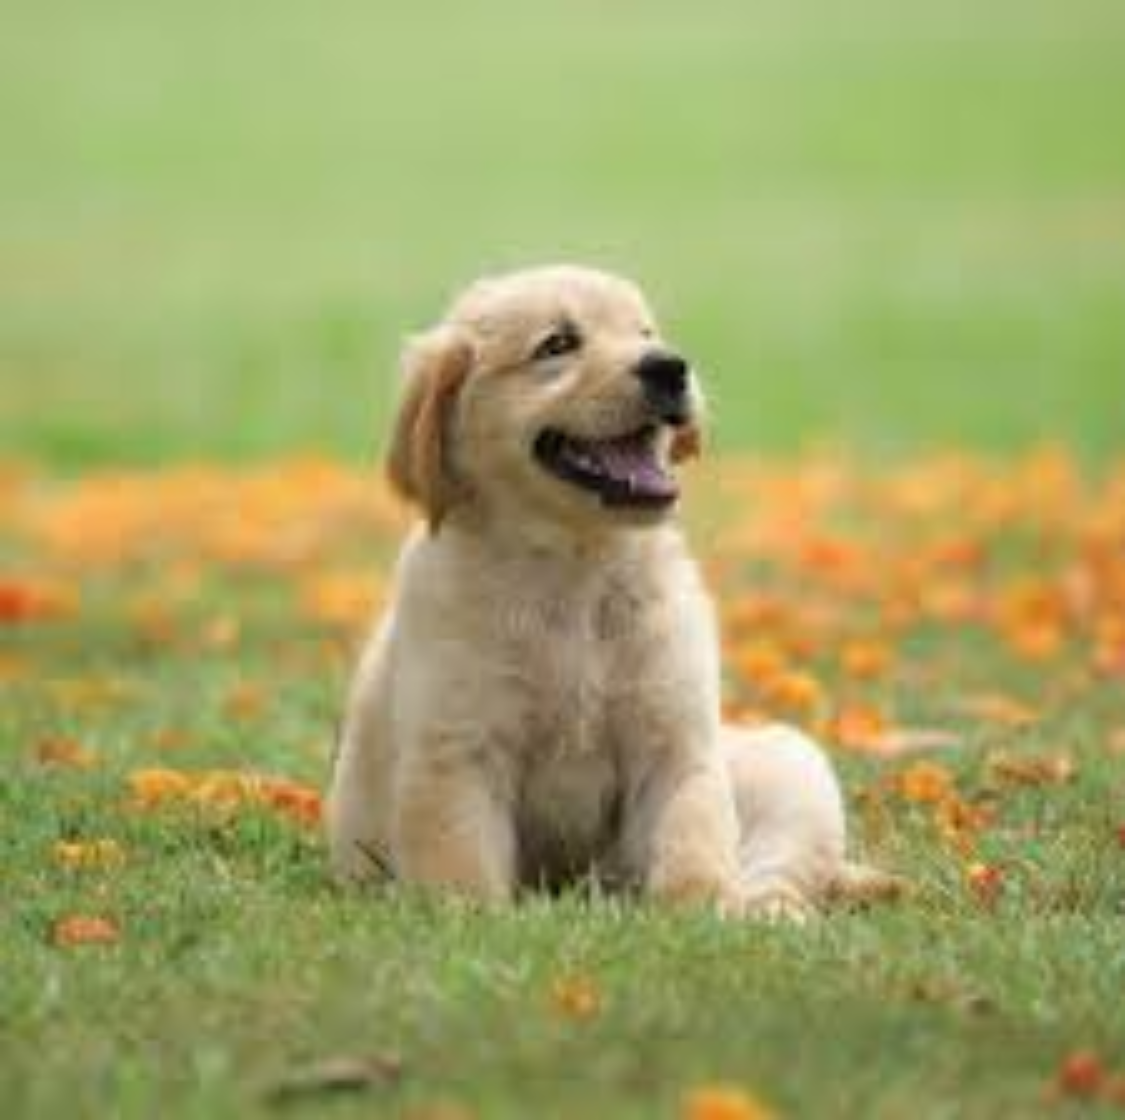

-1

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/dog1.jpeg', cv2.IMREAD_COLOR)
height, width = img.shape[:2]
dst = cv2.resize(img, (int(width*5), int(height*5)))
dst2 = cv2.resize(img, (int(width*5), int(height*5)), interpolation=cv2.INTER_LINEAR)



cv2_imshow(dst)
cv2_imshow(dst2)
cv2.waitKey(0)

In [14]:
!pip install numpy==1.23.0

<ipython-input-15-ca0b138f4839>:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ix = np.floor(x).astype(np.int)
<ipython-input-15-ca0b138f4839>:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for mo

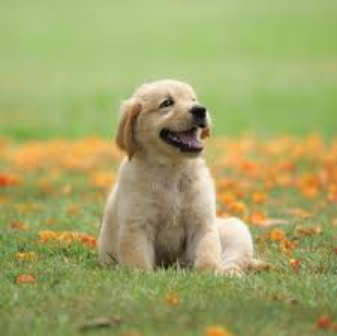

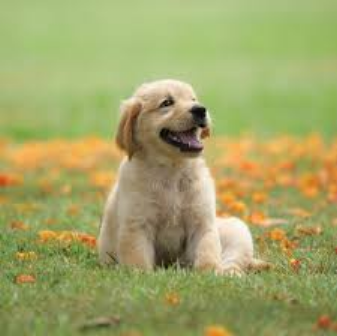

-1

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def bl_interpolate(img, ax=1., ay=1.):
	H, W, C = img.shape

	aH = int(ay * H)
	aW = int(ax * W)

	# get position of resized image
	y = np.arange(aH).repeat(aW).reshape(aH, -1)
	x = np.tile(np.arange(aW), (aH, 1))

	# get position of original position
	y = (y / ay)
	x = (x / ax)

	ix = np.floor(x).astype(np.int)
	iy = np.floor(y).astype(np.int)

	ix = np.minimum(ix, W-2)
	iy = np.minimum(iy, H-2)

	# get distance
	dx = x - ix
	dy = y - iy

	dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
	dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1)

	# interpolation
	out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]

	out = np.clip(out, 0, 255)
	out = out.astype(np.uint8)

	return out

img = cv2.imread('/content/drive/MyDrive/dog1.jpeg', cv2.IMREAD_COLOR)
height, width = img.shape[:2]

res_default = cv2.resize(img, (int(width*1.5), int(height*1.5)))
res_int = bl_interpolate(img, ax=1.5, ay=1.5)

cv2_imshow(res_default)
cv2_imshow(res_int)
cv2.waitKey(0)